In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

# EDA on Raw Data

In [5]:
app_data = pd.read_csv('Application Data.csv')
bureau_data = pd.read_csv('Bureau Data.csv')

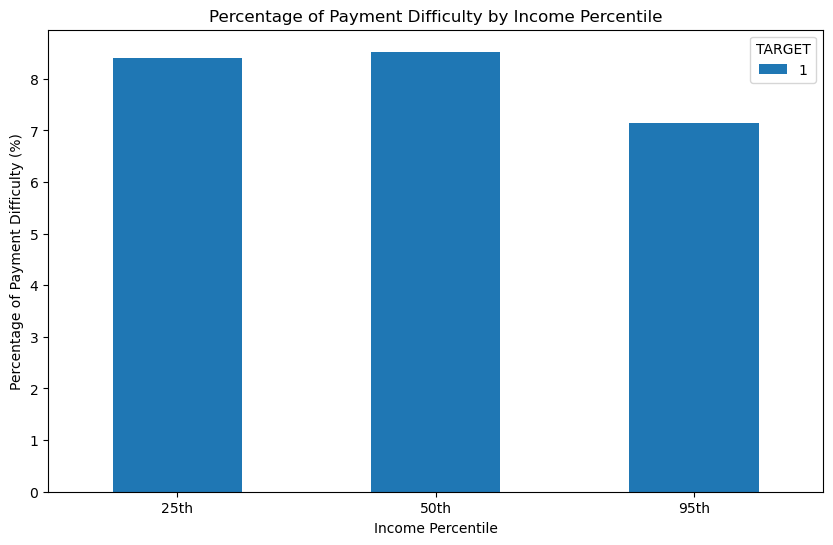

In [6]:
income_percentiles = [25, 50, 95]
income_thresholds = app_data['AMT_INCOME_TOTAL'].quantile([p / 100 for p in income_percentiles])

percentile_labels = pd.qcut(app_data['AMT_INCOME_TOTAL'], len(income_percentiles), labels=['25th', '50th', '95th'])

app_data['Percentile'] = percentile_labels

target_proportions = app_data.groupby(['Percentile', 'TARGET']).size() / app_data.groupby('Percentile').size() * 100

target_proportions = target_proportions.unstack(fill_value=0)

target_proportions = target_proportions[1]

plt.figure(figsize=(10, 6))
target_proportions.plot(kind='bar')
plt.title('Percentage of Payment Difficulty by Income Percentile')
plt.xlabel('Income Percentile')
plt.ylabel('Percentage of Payment Difficulty (%)')
plt.xticks(rotation=0)
# plt.yscale('log')
plt.legend(title='TARGET')
plt.show()

In [41]:
app_df = pd.read_csv('95th_percentile_income.csv')
bureau_data = pd.read_csv('Bureau Data.csv')

In [42]:
app_df.isnull().sum(axis=0)

Unnamed: 0                       0
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1483
AMT_REQ_CREDIT_BUREAU_WEEK    1483
AMT_REQ_CREDIT_BUREAU_MON     1483
AMT_REQ_CREDIT_BUREAU_QRT     1483
AMT_REQ_CREDIT_BUREAU_YEAR    1483
Length: 120, dtype: int64

In [43]:
app_df.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,15825.000000,15825.000000,15825.000000,15825.000000,1.582500e+04,1.582500e+04,15825.000000,1.581900e+04,15825.000000,15825.000000,...,15825.000000,15825.000000,15825.000000,15825.000000,14342.000000,14342.000000,14342.000000,14342.000000,14342.000000,14342.000000
mean,153695.760506,278111.376998,0.058831,0.476335,4.574142e+05,9.906264e+05,44361.398389,9.093510e+05,0.029663,-15748.591216,...,0.011311,0.001011,0.000442,0.000190,0.006484,0.006833,0.034096,0.399386,0.285107,1.878748
std,88804.114082,102826.898185,0.235315,0.761057,9.657490e+05,5.312027e+05,21945.511407,4.997602e+05,0.021629,3617.862534,...,0.105754,0.031782,0.021028,0.013768,0.085321,0.112446,0.196249,1.220662,2.261035,1.880432
min,7.000000,100010.000000,0.000000,0.000000,3.375000e+05,4.500000e+04,3523.500000,4.500000e+04,0.000533,-25229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77460.000000,189812.000000,0.000000,0.000000,3.600000e+05,5.850000e+05,30483.000000,4.950000e+05,0.010500,-18461.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,153234.000000,277617.000000,0.000000,0.000000,4.050000e+05,9.000000e+05,41679.000000,9.000000e+05,0.024610,-15502.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,231635.000000,368300.000000,0.000000,1.000000,4.500000e+05,1.293502e+06,53851.500000,1.147500e+06,0.046220,-12925.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,307496.000000,456240.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7706.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,27.000000,261.000000,17.000000


In [44]:
null_counts = app_df.isnull().sum(axis=0)
print(null_counts.to_string()) 

Unnamed: 0                         0
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    6
NAME_TYPE_SUITE                   93
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     6829
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
F

In [45]:
missing_ratio = app_df.isnull().mean(axis=1)
  
# Filter rows with missing value ratio above the threshold
high_missing_rows = app_df[missing_ratio > 0.8]
  
print(high_missing_rows)

Empty DataFrame
Columns: [Unnamed: 0, SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_

In [46]:
print(f'Percent of total rows missing more than 3 values: \
{(app_df[app_df.isnull().sum(axis = 1) > 3].shape[0] / app_df.shape[0]):.3%}')


Percent of total rows missing more than 3 values: 65.725%


In [47]:
#rows_org = app_df.shape[0]
#print(f'Starting row count: {rows_org}')
# drop rows based on a threshold of more than 3 missing values per row
#app_df = app_df.dropna(thresh = app_df.shape[1] - 3)
#print(f'Ending row count: {app_df.shape[0]}')
#print(f'Percent dropped: {(1 - app_df.shape[0] / rows_org):.3%}')

In [48]:
app_df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
2,33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
3,49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0


In [49]:
app_df['OWN_CAR_AGE'] = app_df['OWN_CAR_AGE'].fillna(app_df['OWN_CAR_AGE'].mean())


In [76]:
app_df['AMT_GOODS_PRICE'] = app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].mean())


In [50]:
print(app_df['NAME_TYPE_SUITE'].unique())

['Unaccompanied' 'Spouse, partner' 'Family' 'Group of people' 'Other_B'
 'Children' nan 'Other_A']


In [51]:
app_df["NAME_TYPE_SUITE"].fillna(value = 'Missing', inplace = True)
print("nan     ", app_df["NAME_TYPE_SUITE"].isna().sum())

nan      0


In [52]:
app_df["OCCUPATION_TYPE"].fillna(value = 'Other', inplace = True)

In [53]:
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].fillna(app_df['CNT_FAM_MEMBERS'].mode()[0])

In [54]:
print(app_df["AMT_REQ_CREDIT_BUREAU_HOUR"].unique())
print(app_df["AMT_REQ_CREDIT_BUREAU_DAY"].unique())
print(app_df["AMT_REQ_CREDIT_BUREAU_WEEK"].unique())
print(app_df["AMT_REQ_CREDIT_BUREAU_MON"].unique())
print(app_df["AMT_REQ_CREDIT_BUREAU_QRT"].unique())
print(app_df["AMT_REQ_CREDIT_BUREAU_YEAR"].unique())

[ 0. nan  1.  2.  3.]
[ 0. nan  2.  1.  4.  3.  6.]
[ 0. nan  1.  3.  2.  4.  6.]
[ 0. nan  1.  3.  9.  5.  4.  2. 11.  8.  7. 12.  6. 16. 17. 15. 14. 10.
 13. 18. 27.]
[  0.   1.  nan   4.   2.   3.   8.   5.   6. 261.]
[ 0.  5.  1. nan  3.  2.  4.  7.  6.  8.  9. 12. 15. 17. 10. 13.]


In [55]:
# Fill missing values in the specified columns with "NIL"
app_df.fillna(value={"AMT_REQ_CREDIT_BUREAU_HOUR": app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],
                   "AMT_REQ_CREDIT_BUREAU_DAY": app_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],
                   "AMT_REQ_CREDIT_BUREAU_WEEK": app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],
                   "AMT_REQ_CREDIT_BUREAU_MON": app_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],
                   "AMT_REQ_CREDIT_BUREAU_QRT": app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],
                   "AMT_REQ_CREDIT_BUREAU_YEAR": app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]}, inplace=True)

In [56]:
print(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].unique())
print(app_df['DEF_30_CNT_SOCIAL_CIRCLE'].unique())
print(app_df['OBS_60_CNT_SOCIAL_CIRCLE'].unique())
print(app_df['DEF_60_CNT_SOCIAL_CIRCLE'].unique())

[ 2.  0.  1.  4.  6. 10.  3.  5. nan  9.  8.  7. 15. 14. 11. 13. 21. 12.
 23. 27. 22. 20. 19. 16. 17. 18. 25.]
[ 0.  1. nan  2.  3.  4.  5.]
[ 2.  0.  1.  4.  6. 10.  3.  5. nan  9.  8.  7. 15. 14. 11. 13. 21. 12.
 23. 27. 20. 19. 16. 17. 18. 25.]
[ 0.  1. nan  2.  3.  4.  5.]


In [57]:
filtered_df = app_df[(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].isna()) | 
                 (app_df['DEF_30_CNT_SOCIAL_CIRCLE'].isna()) | 
                 (app_df['OBS_60_CNT_SOCIAL_CIRCLE'].isna()) | 
                 (app_df['DEF_60_CNT_SOCIAL_CIRCLE'].isna())]

filtered_df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
61,1064,101235,0,Revolving loans,F,N,Y,0,720000.0,1350000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
64,1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
65,1209,101424,0,Revolving loans,M,N,Y,1,360000.0,855000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
96,1743,102038,0,Revolving loans,F,Y,N,2,337500.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
108,1939,102272,0,Revolving loans,M,Y,Y,0,450000.0,540000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [58]:
rows = filtered_df.shape[0]
print(f'row count: {rows}')

row count: 154


In [59]:
# Fill missing values (NaN) in observations columns with 0
cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

app_df[cols] = app_df[cols].fillna(0)

In [60]:
null_counts = app_df.isnull().sum(axis=0)
print(null_counts.to_string()) 

Unnamed: 0                         0
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    6
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
F

In [61]:
#Convert DAYS_BIRTH into year
app_df['AGE'] = abs(app_df['DAYS_BIRTH']) // 365
app_df.drop('DAYS_BIRTH', axis=1, inplace=True)

In [62]:
#One hot encoding for Name Contract Type
#app_df = pd.get_dummies(app_df, columns = ['NAME_CONTRACT_TYPE'], drop_first = False)
#with pd.option_context('display.max_rows', 6):
    #display(app_df)

In [63]:
print(app_df.dtypes.to_string())

Unnamed: 0                        int64
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [64]:
app_df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,51
1,22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,30
2,33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32
3,49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50
4,51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0,51


In [77]:
null_counts = app_df.isnull().sum(axis=0)
print(null_counts.to_string()) 

Unnamed: 0                         0
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [ ]:
#app_df.to_csv('cleaned_app_data.csv', index=False)

In [73]:
bureau_data.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [79]:
bureau_data_95th_percentile = bureau_data.merge(app_df[['SK_ID_CURR']], how='inner', on='SK_ID_CURR')

In [82]:
bureau_data_95th_percentile

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,228777,5714770,Closed,currency 1,-2264,0,-1153.0,-1479.0,21161.115,0,337500.0,-15.255,337515.255,0.0,Credit card,-1202,NaN
1,228777,5714772,Closed,currency 1,-1419,0,-657.0,-687.0,25470.000,0,481320.0,0.000,0.000,0.0,Consumer credit,-687,NaN
2,228777,5714773,Closed,currency 1,-1222,0,-96.0,-1129.0,0.000,0,1588140.0,0.000,0.000,0.0,Consumer credit,-1129,NaN
3,228777,5714774,Closed,currency 1,-838,0,380.0,-534.0,NaN,0,639000.0,0.000,0.000,0.0,Consumer credit,-328,NaN
4,228777,5714775,Closed,currency 1,-1057,0,404.0,-323.0,NaN,0,423000.0,0.000,0.000,0.0,Consumer credit,-291,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95679,252744,6843345,Closed,currency 1,-1629,0,12708.0,-1402.0,NaN,0,585000.0,0.000,0.000,0.0,Credit card,-1387,NaN
95680,146062,5040482,Closed,currency 1,-2397,0,-571.0,-674.0,NaN,0,720000.0,0.000,0.000,0.0,Consumer credit,-347,NaN
95681,234379,5581998,Active,currency 1,-876,0,6437.0,NaN,NaN,0,8100000.0,6217267.500,0.000,0.0,Mortgage,-13,NaN
95682,234379,5581999,Closed,currency 1,-1479,0,-1114.0,-1130.0,42448.500,0,450000.0,NaN,NaN,0.0,Consumer credit,-1130,NaN


In [81]:
bureau_data_95th_percentile.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,95684.000000,9.568400e+04,95684.000000,95684.000000,89801.000000,57880.000000,3.206700e+04,95684.000000,9.568200e+04,7.995900e+04,5.870200e+04,9.568400e+04,95684.000000,2.551200e+04
mean,279317.580076,5.900886e+06,-1184.209345,0.354824,823.652487,-1028.712491,8.412383e+03,0.010190,9.012971e+05,3.566609e+05,1.260480e+04,5.506255e+01,-572.275051,3.587257e+04
std,103089.542970,5.342955e+05,792.082526,21.112852,5273.417788,710.079192,1.284257e+05,0.120141,2.257708e+06,1.453090e+06,9.142298e+04,1.196276e+04,764.897554,4.948852e+05
min,100010.000000,5.000005e+06,-2922.000000,0.000000,-42013.000000,-2913.000000,0.000000e+00,0.000000,0.000000e+00,-4.705600e+06,-3.725982e+05,0.000000e+00,-41916.000000,0.000000e+00
25%,190381.000000,5.429480e+06,-1711.000000,0.000000,-1017.000000,-1495.000000,0.000000e+00,0.000000,8.927543e+04,0.000000e+00,0.000000e+00,0.000000e+00,-867.000000,0.000000e+00
50%,279204.000000,5.872994e+06,-1030.000000,0.000000,-187.000000,-898.000000,0.000000e+00,0.000000,2.475000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-371.000000,1.350000e+03
75%,369463.000000,6.371402e+06,-523.000000,0.000000,750.000000,-442.000000,0.000000e+00,0.000000,9.000000e+05,9.267028e+04,0.000000e+00,0.000000e+00,-30.000000,2.886975e+04
max,456240.000000,6.843345e+06,0.000000,2540.000000,31198.000000,0.000000,1.376642e+07,4.000000,1.469585e+08,6.457024e+07,4.705600e+06,3.681063e+06,22.000000,5.747623e+07


In [83]:
#bureau_data_95th_percentile.to_csv('bureau_data_95th_percentile.csv', index=False)

In [9]:
application_data_path = 'cleaned_app_data.csv'
bureau_data_path = 'Bureau Data.csv'

# Load data
application_df = pd.read_csv(application_data_path)
bureau_df = pd.read_csv(bureau_data_path)

# Define aggregation dictionary for Bureau data
agg_dict = {
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'mean',
    'DAYS_CREDIT_ENDDATE': 'mean',
    'DAYS_ENDDATE_FACT': 'mean',
    'DAYS_CREDIT_UPDATE': 'mean',
    'AMT_CREDIT_MAX_OVERDUE': 'sum',
    'CNT_CREDIT_PROLONG': 'sum',
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'AMT_CREDIT_SUM_LIMIT': 'sum',
    'AMT_CREDIT_SUM_OVERDUE': 'sum',
    'AMT_ANNUITY': 'sum'
}

# Group by SK_ID_CURR and aggregate
bureau_agg = bureau_df.groupby('SK_ID_CURR').agg(agg_dict).reset_index()

# Merge aggregated bureau data with application data
data = application_df.merge(bureau_agg, on='SK_ID_CURR', how='left')

data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_y
0,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,-119.500000,-1138.000000,-578.000000,0.00,0.0,990000.000,348007.50,0.00,0.0,0.0
1,22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,...,899.000000,-916.000000,-314.666667,0.00,0.0,5625000.000,3477814.38,0.00,0.0,0.0
2,33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,...,126.625000,-636.400000,-372.111111,0.00,0.0,4489092.000,2438748.00,0.00,0.0,0.0
3,49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,...,-154.400000,-382.000000,-306.600000,17087.94,0.0,2157469.200,980784.00,0.00,0.0,49986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,307460,456199,0,Cash loans,M,Y,N,1,382500.0,745429.5,...,-1253.769231,-1418.166667,-1244.692308,13669.56,0.0,1268687.295,108517.50,0.00,0.0,0.0
15821,307477,456217,0,Cash loans,F,N,Y,0,360000.0,796396.5,...,-503.000000,-1002.250000,-430.666667,0.00,0.0,1976752.350,637492.50,0.00,0.0,168421.5
15822,307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15823,307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,...,478.769231,-1343.888889,-946.153846,30861.00,0.0,8306682.750,3094557.75,0.00,0.0,0.0


In [ ]:
#Convert DAYS_EMPLOYED to YEARS_EMPLOYED
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'] / -365.25
data.drop(columns='DAYS_EMPLOYED', inplace=True)

# EDA

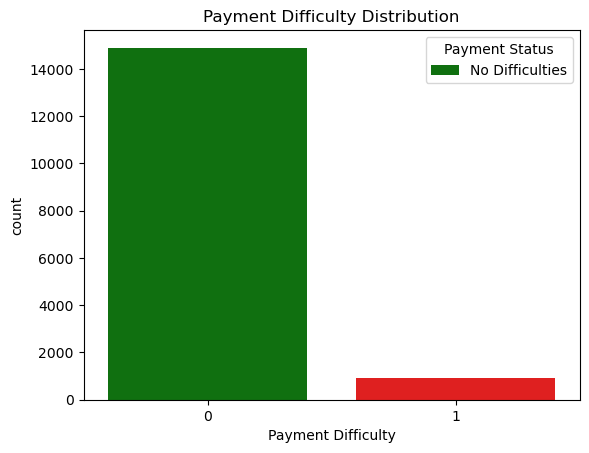

In [13]:

# Filter data for target variable values 0 and 1 (payment difficulties)
filtered_data = data[data['TARGET'].isin([0, 1])]

# Define a custom color palette (optional)
palette = ['green', 'red']  # Green for 0 (no difficulties), Red for 1 (difficulties)

# Create a countplot with custom color palette
sns.countplot(x='TARGET', data=filtered_data, palette=palette)

# Set labels for the x-axis
plt.xlabel('Payment Difficulty')

# Set chart title
plt.title('Payment Difficulty Distribution')

# Add a legend to explain the color mapping (optional)
plt.legend(title='Payment Status', labels=['No Difficulties', 'Difficulties'])

# Display the plot
plt.show()


## House-Ownership Percentage in High-Income Segment

In [17]:
# Count applicants with house in high income dataframe
house_owners = data[data['FLAG_OWN_REALTY'] == 'Y'].shape[0]

# Calculate total applicants in high income dataframe
total_applicants = len(data)

# Calculate percentage of house owners
percent_house_owners = (house_owners / total_applicants) * 100

# Print result
print(f"House-Ownership Percentage: {percent_house_owners:.2f}%")

House-Ownership Percentage: 69.84%


## Car-Ownership Percentage in High-Income Segment

In [19]:
# Count applicants with car in high income dataframe
car_owners = data[data['FLAG_OWN_CAR'] == 'Y'].shape[0]

# Calculate total applicants in high income dataframe
total_applicants = len(data)

# Calculate percentage of car owners
percent_car_owners = (car_owners / total_applicants) * 100

# Print result
print(f"Car-Ownership percentage: {percent_car_owners:.2f}%")

Car-Ownership percentage: 56.85%


## Distribution of Children in High-Income Segment

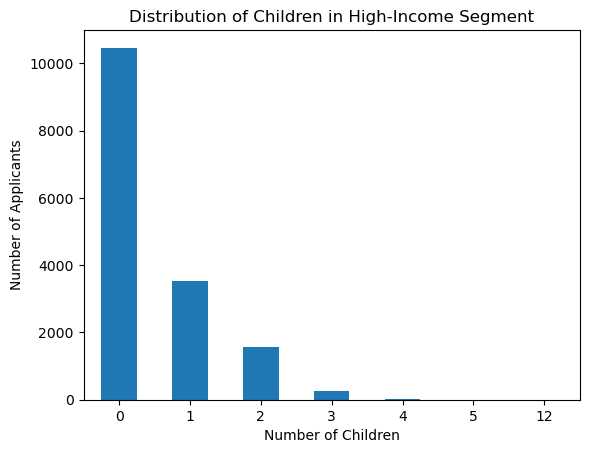

In [21]:
# Visualize the distribution of children in the high-income segment
children_distribution = data['CNT_CHILDREN'].value_counts().sort_values(ascending=False)
children_distribution.plot(kind='bar')

# Customize the plot for better readability
import matplotlib.pyplot as plt
plt.xlabel("Number of Children")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=0)
plt.title("Distribution of Children in High-Income Segment")
plt.show()

## Average Income by Occupation in High-Income Segment (Highest to Lowest)

In [23]:
# Sort applicants by occupation type and calculate average income
occupation_groups = data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean()
sorted_occupations = occupation_groups.sort_values(ascending=False)

# Print results
print("Average income by occupation (highest to lowest):")
print(sorted_occupations)

Average income by occupation (highest to lowest):
OCCUPATION_TYPE
Managers                 494600.506495
Laborers                 486273.312388
Secretaries              484758.620690
IT staff                 479039.171642
Other                    446224.822990
Accountants              446199.901469
Core staff               438230.997087
Private service staff    431159.638554
High skill tech staff    427771.135514
Sales staff              423904.427807
HR staff                 418997.872340
Cleaning staff           414631.578947
Drivers                  411433.310166
Medicine staff           411026.635514
Realty agents            406700.000000
Security staff           393065.568862
Waiters/barmen staff     385548.387097
Cooking staff            385087.500000
Low-skill Laborers       382500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


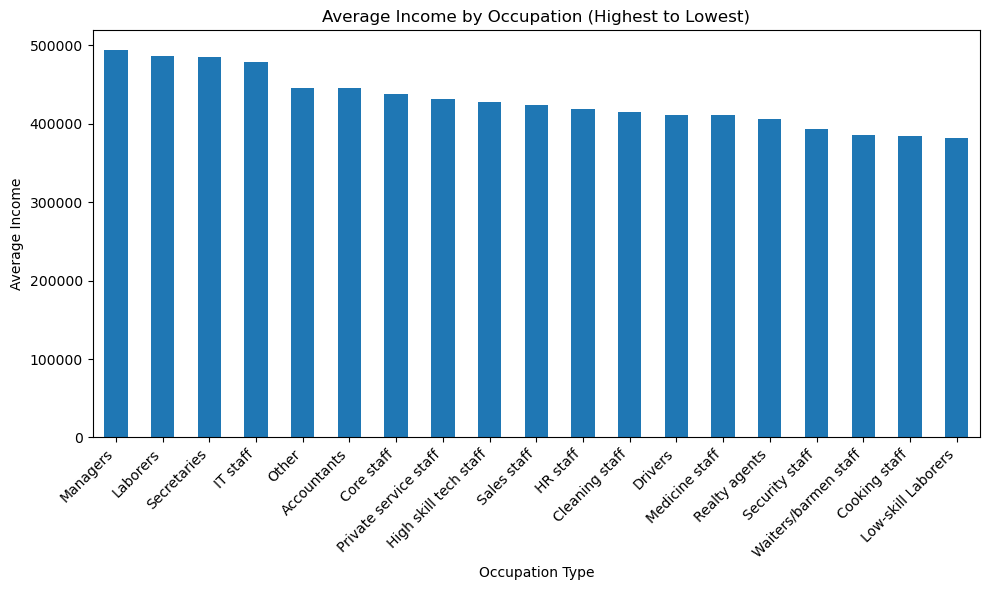

In [24]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sorted_occupations.plot(kind='bar')
plt.title("Average Income by Occupation (Highest to Lowest)")
plt.xlabel("Occupation Type")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

## Proportion of each occupation in high-income segment 

In [26]:
occupation_counts = data['OCCUPATION_TYPE'].value_counts()

# Calculate the total number of applicants in the high income dataframe
total_high_income = len(data)

# Calculate the percentage of each occupation in the high income dataframe
occupation_percentages = (occupation_counts / total_high_income) * 100

# Print result
print("Percentage of each occupation in the high-income segment:")
print(occupation_percentages.to_string())

Percentage of each occupation in the high-income segment:
Managers                 28.410742
Other                    23.418641
Laborers                 10.559242
Core staff                9.763033
Drivers                   6.091627
Sales staff               5.908373
Accountants               5.162717
High skill tech staff     4.733017
Medicine staff            1.352291
Security staff            1.055292
Private service staff     1.048973
Cooking staff             0.505529
IT staff                  0.423381
Secretaries               0.366509
Cleaning staff            0.360190
HR staff                  0.296998
Realty agents             0.284360
Waiters/barmen staff      0.195893
Low-skill Laborers        0.063191


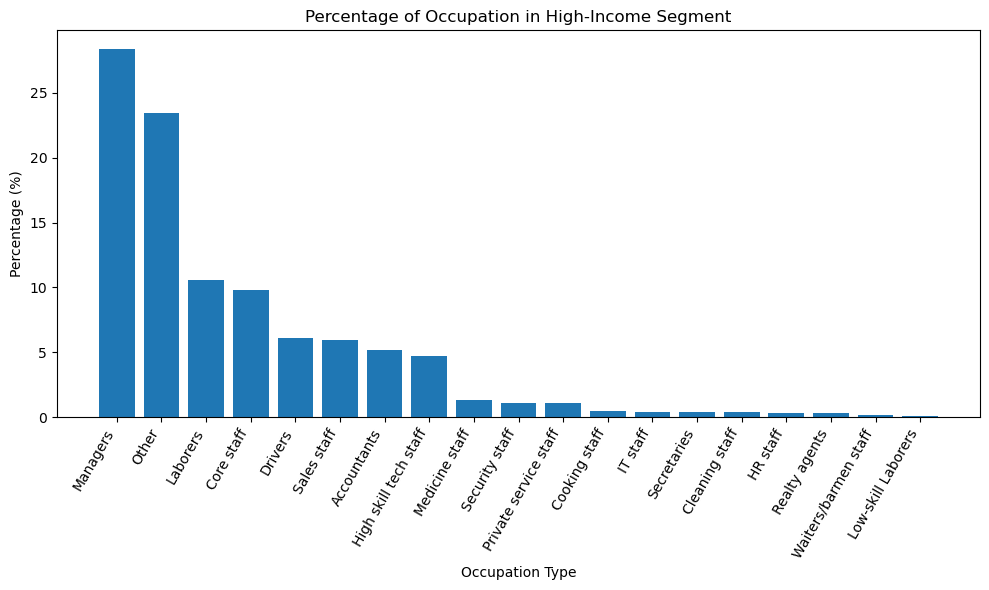

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(occupation_percentages.index, occupation_percentages.values)
plt.xlabel("Occupation Type")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Occupation in High-Income Segment")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [33]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()


def univariate_barplots(data, col1, col2='TARGET', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

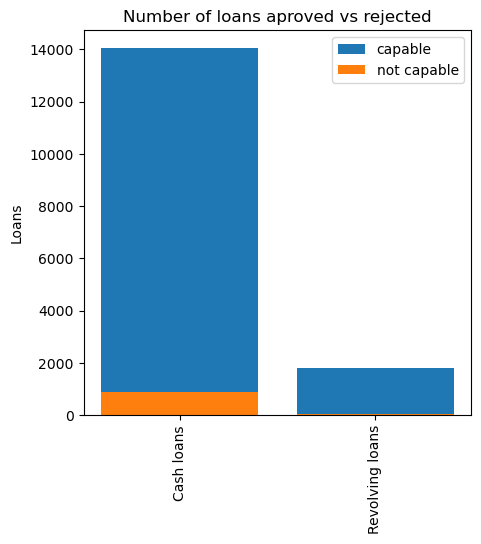

  NAME_CONTRACT_TYPE  TARGET  total       Avg
0         Cash loans     886  14038  0.063114
1    Revolving loans      45   1787  0.025182
  NAME_CONTRACT_TYPE  TARGET  total       Avg
0         Cash loans     886  14038  0.063114
1    Revolving loans      45   1787  0.025182


In [34]:

# Call the univariate_barplots function and pass the required parameters
univariate_barplots(data, "NAME_CONTRACT_TYPE")

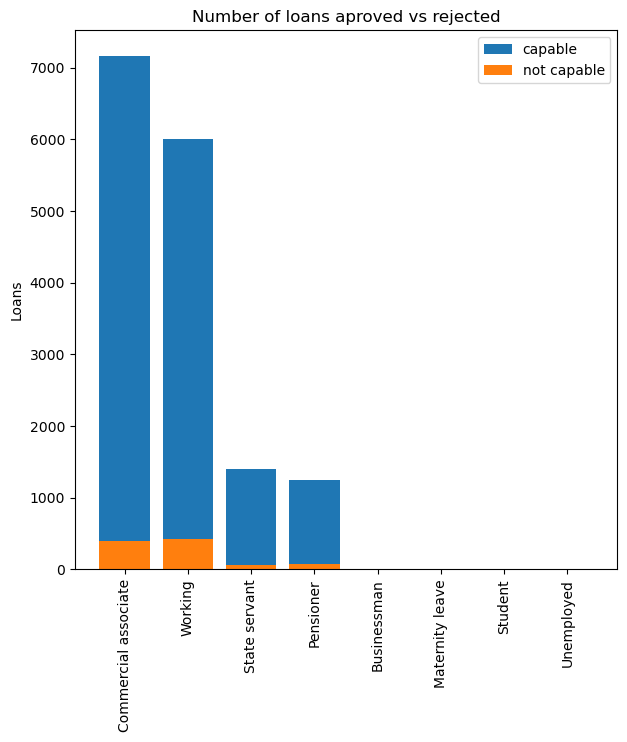

       NAME_INCOME_TYPE  TARGET  total       Avg
1  Commercial associate     389   7167  0.054277
7               Working     426   6006  0.070929
4         State servant      51   1404  0.036325
3             Pensioner      65   1239  0.052462
0           Businessman       0      6  0.000000
  NAME_INCOME_TYPE  TARGET  total       Avg
3        Pensioner      65   1239  0.052462
0      Businessman       0      6  0.000000
2  Maternity leave       0      1  0.000000
5          Student       0      1  0.000000
6       Unemployed       0      1  0.000000


In [36]:
# Call the univariate_barplots function and pass the required parameters
univariate_barplots(data, 'NAME_INCOME_TYPE')


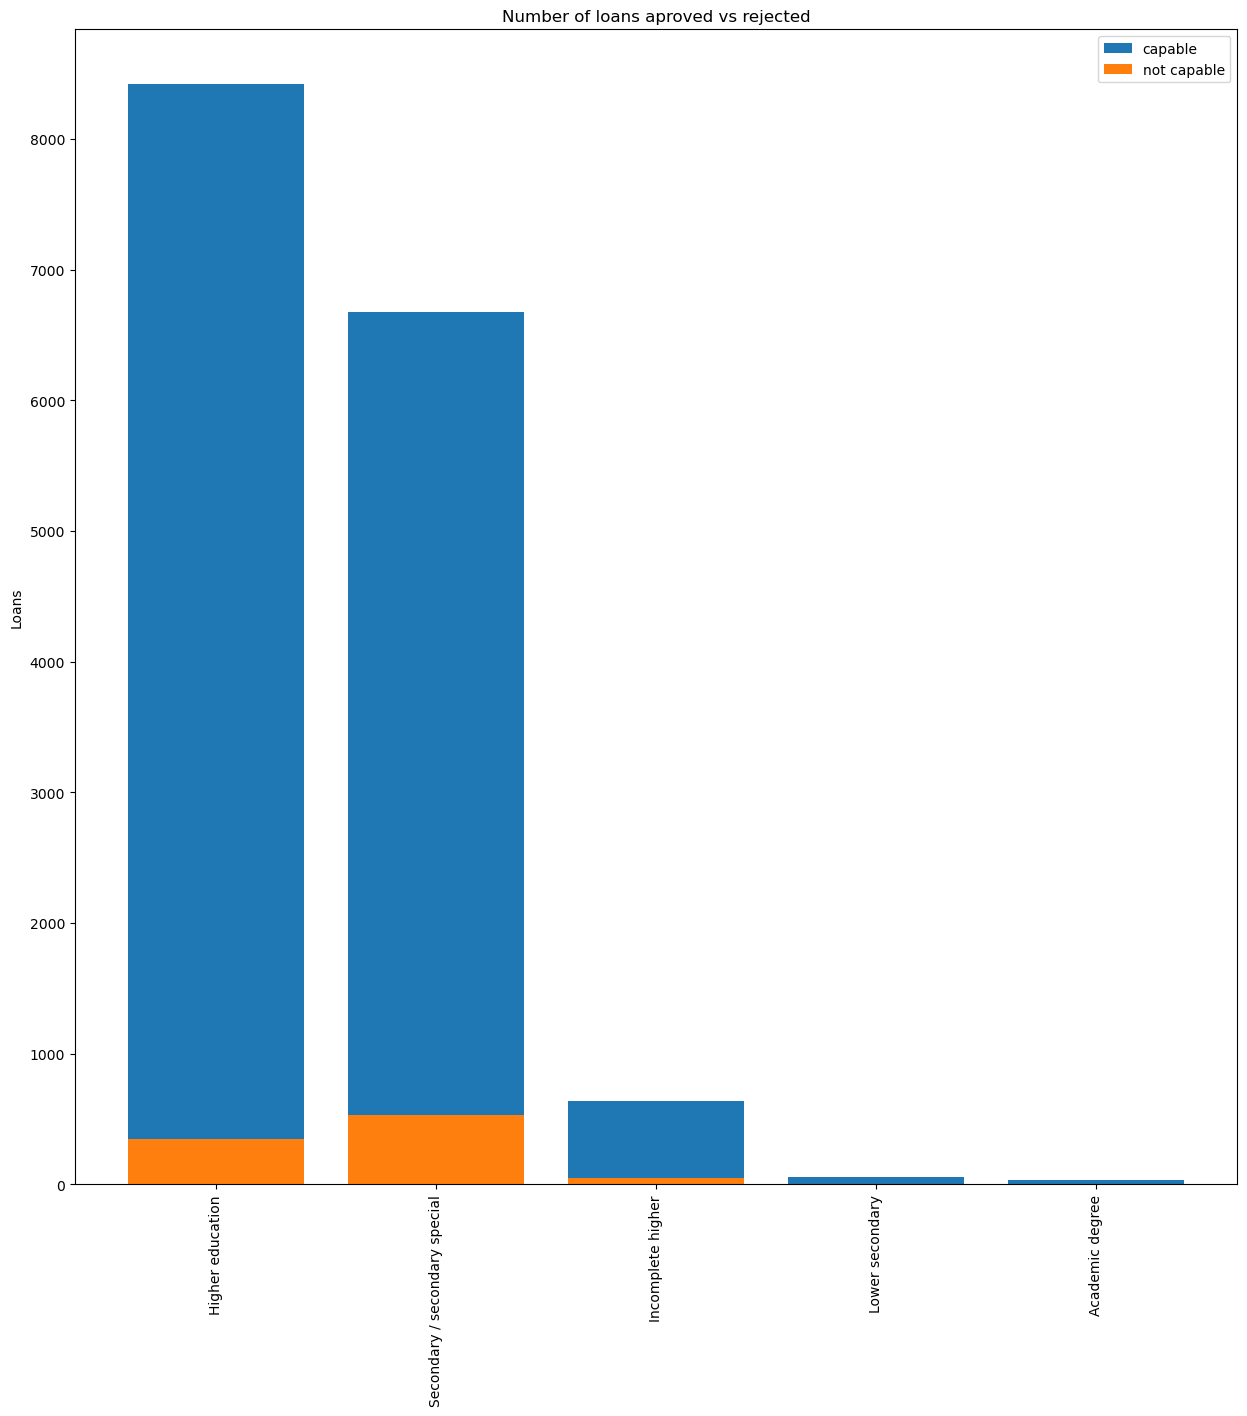

             NAME_EDUCATION_TYPE  TARGET  total       Avg
1               Higher education     346   8417  0.041107
4  Secondary / secondary special     529   6679  0.079203
2              Incomplete higher      51    640  0.079687
3                Lower secondary       3     56  0.053571
0                Academic degree       2     33  0.060606
             NAME_EDUCATION_TYPE  TARGET  total       Avg
1               Higher education     346   8417  0.041107
4  Secondary / secondary special     529   6679  0.079203
2              Incomplete higher      51    640  0.079687
3                Lower secondary       3     56  0.053571
0                Academic degree       2     33  0.060606


In [37]:

# Call the univariate_barplots function and pass the required parameters
univariate_barplots(data, 'NAME_EDUCATION_TYPE')


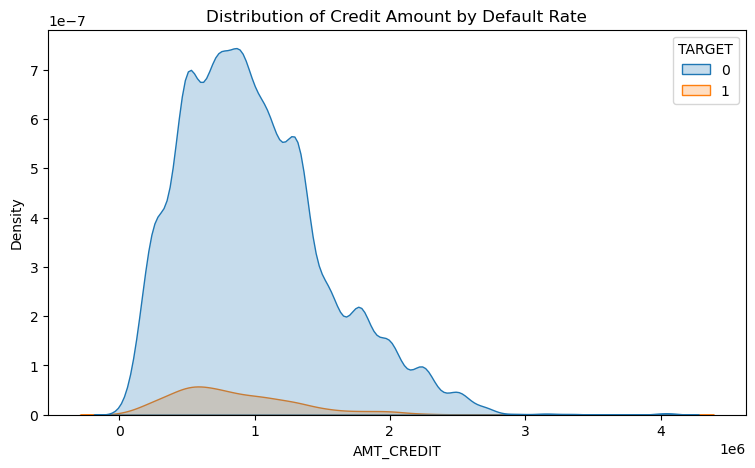

In [41]:

plt.figure(figsize = (9, 5))
sns.kdeplot(data = data, x = 'AMT_CREDIT', hue = 'TARGET', fill = True, common_norm = True)
plt.title('Distribution of Credit Amount by Default Rate');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cdcc90e8-36e0-414c-8ab5-29dde69de6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>